# ORIE 4580/5580/5581 Assignment 3

#### Students: Rishi Kumar (rk639) and Darcy Del Real (dld226)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)

(**Please replace this with your own link!**)

### Instructions


* Due Thursday September 25, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.




### Suggested reading

Chapters 7 (you can skim through this), and chapters 8 and 9 of [Introduction to Probability](https://chance.dartmouth.edu/teaching_aids/books_articles/probability_book/book.html) by Grinstead and Snell.

Chapter 3 and chapter 4 (up to section 4.5) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [ ]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

References: LLMs used for code generation and assistance with markdown formatting

<hr><hr>

## Question 1: Combining LCGs (20 points)

In order to avoid biases, simulations should not use anywhere near the full period of an LCG (otherwise, the random sequence repeats\ldots). For example, a typical traffic simulator may have $10,000$ vehicles, each experiencing thousands of random disturbances, thus needing around $10^7$ random samples per replication -- for this, an LCG using $m=2^{31}-1\approx 2\times 10^9$ is insufficient, as after $100$ replications the sequences get correlated.

One method to combine multiple LCGs to obtain a generator with a longer period is to add a smaller period LCG to it. For example, suppose we have two generators $X_{n+1}  =  (a_1 X_n) \mbox{ mod } m_1$ and $Y_{n+1}  =  (a_2 Y_n) \mbox{ mod } m_2$, with $m_1>m_2$. We can derive a combined generator by setting $Z_n  =  (X_n + Y_n) \mbox{ mod } m_1$. If properly designed, the resulting period can be on the order of $m_1m_2$. We will now study a small example to see how this works.


<hr>

**(a)** Consider two LCGs, $x_{n+1} = (5 x_n) \mod 16$ and $y_{n+1} = (2 y_n) \mod 7$. Starting both with seed $x_0 = y_0 = 1$, plot the sequences $x_n, y_n$ using the clock visualization introduced in class (separate plot for each sequence; you can use and modify the code in Demo-PRNGs.ipynb on Canvas).

<hr>

In [ ]:
# Functions to visualize LCG sequence on clock (see demo notebook)

def plot_clock_face(m, fig, annotate=False):
    """
    Plot points on a unit circle representing the LCG sequence on a clock face.

    Parameters:
    m (int): The modulus value for the LCG sequence.
    fig (matplotlib.figure.Figure): The figure object to draw on.
    annotate (bool): Whether to annotate points with their index.

    Returns:
    None
    """
    # Plot m points on the unit circle
    for i in range(m):
        theta = 2.0 * np.pi * i / m
        plt.plot(np.sin(theta), np.cos(theta), 'rs', markersize = 10)
        if annotate:
            plt.annotate(str(i), (np.pi/2 - theta, 1.05), xycoords='polar')

def plot_clock_path(m, x, fig, color='y'):
    """
    Plot the path of an LCG sequence on a clock face.

    Parameters:
    m (int): The modulus value for the LCG sequence.
    x (numpy.ndarray): The LCG sequence.
    fig (matplotlib.figure.Figure): The figure object to draw on.
    color (str): The color for the path.

    Returns:
    None
    """
    # Plot the seed node
    theta_0 = 2.0 * np.pi * (x[0] * (m + 1) - 1) / m
    plt.plot(np.sin(theta_0), np.cos(theta_0), 'gs', markersize = 10)

    # Plot the path of the LCG sequence
    for i in range(len(x) - 1):
        theta_start = 2.0 * np.pi * (x[i] * (m + 1) - 1) / m
        theta_end = 2.0 * np.pi * (x[i + 1] * (m + 1) - 1) / m
        x_start = np.sin(theta_start)
        y_start = np.cos(theta_start)
        del_x = np.sin(theta_end) - np.sin(theta_start)
        del_y = np.cos(theta_end) - np.cos(theta_start)
        if abs(del_x) > 0 or abs(del_y) > 0:
            plt.arrow(x_start, y_start, del_x, del_y,
                      length_includes_head=True, head_width=0.05, head_length=0.1, fc=color, ec=color)



In [ ]:
# Function to generate pseudorandom sequence using LCG
# Set default parameters to glibc specifications (see demo notebook)
# 2. Function to generate pseudorandom sequence using LCG
# Set default parameters to glibc specifications (see demo notebook)

def LCG(n, m=2**31-1, a=1103515245, c=12345, seed=1):
    """
    Generate a pseudorandom sequence using a Linear Congruential Generator (LCG).

    Parameters:
    n (int): The number of pseudorandom numbers to generate.
    m (int): The modulus value (default is 2^31-1, following glibc specifications).
    a (int): The multiplier value (default is 1103515245, following glibc specifications).
    c (int): The increment value (default is 12345, following glibc specifications).
    seed (int): The initial seed value (default is 1).

    Returns:
    numpy.ndarray: An array of pseudorandom numbers in the range [0, 1).
    """
    # Initialize an array to store the generated pseudorandom numbers
    output = np.zeros(n)

    x = seed
    for i in range(n):
        # Calculate the pseudorandom number and normalize it to [0, 1)
        output[i] = (x + 1.0) / (m + 1.0)

        # Update the LCG state using the specified parameters
        x = (a * x + c) % m

    return output



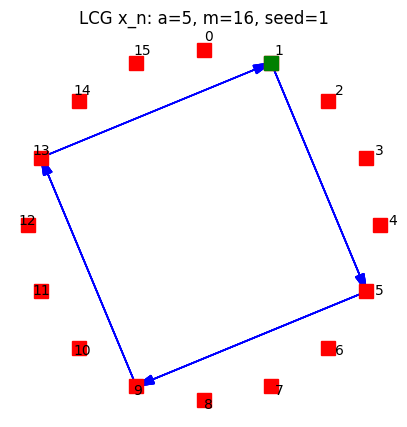

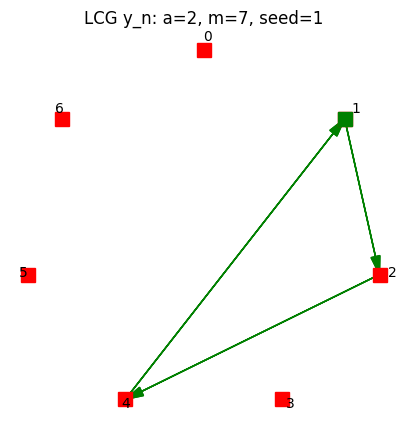

Raw x_n sequence (mod 16): [1, 5, 9, 13, 1, 5, 9, 13, 1, 5, 9, 13, 1, 5, 9, 13]
Raw y_n sequence (mod 7): [1, 2, 4, 1, 2, 4, 1]


In [ ]:
# Ans
# 3. Ans

# x_n: x_{n+1} = (5 * x_n) mod 16, with seed = 1
m1, a1, c1, seed1 = 16, 5, 0, 1
x_vals = []
x = seed1
for _ in range(m1):  # full cycle
    x_vals.append(x)
    x = (a1 * x + c1) % m1
x_seq = np.array([(xi + 1.0) / (m1 + 1.0) for xi in x_vals])  # normalize

fig = plt.figure(figsize=(5,5))
plot_clock_face(m1, fig, annotate=True)
plot_clock_path(m1, x_seq, fig, color='b')
plt.axis('off')
plt.title("LCG x_n: a=5, m=16, seed=1")
plt.show()

# y_n: y_{n+1} = (2 * y_n) mod 7, with seed = 1
m2, a2, c2, seed2 = 7, 2, 0, 1
y_vals = []
y = seed2
for _ in range(m2):  # full cycle
    y_vals.append(y)
    y = (a2 * y + c2) % m2
y_seq = np.array([(yi + 1.0) / (m2 + 1.0) for yi in y_vals])  # normalize

fig = plt.figure(figsize=(5,5))
plot_clock_face(m2, fig, annotate=True)
plot_clock_path(m2, y_seq, fig, color='g')
plt.axis('off')
plt.title("LCG y_n: a=2, m=7, seed=1")
plt.show()

print("Raw x_n sequence (mod 16):", x_vals)
print("Raw y_n sequence (mod 7):", y_vals)


<hr>

**(b)** Next, define a combined LCG as $z_{n} = (x_n+y_n) \mod 16$. Starting both the base LCGs with seed $x_0 = y_0 = 1$, plot the sequence $z_n$ using the clock visualization given in class.

<hr>

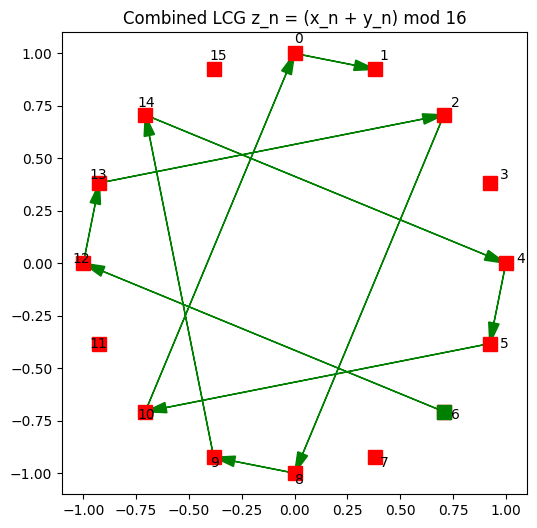

x_n sequence: [5, 9, 13, 1, 5, 9, 13, 1, 5, 9, 13, 1]
y_n sequence: [2, 4, 1, 2, 4, 1, 2, 4, 1, 2, 4, 1]
z_n sequence: [7, 13, 14, 3, 9, 10, 15, 5, 6, 11, 1, 2]


In [ ]:
# Parameters for x_n and y_n
a_x, m_x, seed_x = 5, 16, 1
a_y, m_y, seed_y = 2, 7, 1

# Number of terms to generate
n_terms = 12

# Generate raw sequences (unnormalized version of LCG)
def LCG_raw(a, m, seed, n):
    x = seed
    seq = []
    for _ in range(n):
        x = (a * x) % m
        seq.append(x)
    return seq

x_seq = LCG_raw(a_x, m_x, seed_x, n_terms)
y_seq = LCG_raw(a_y, m_y, seed_y, n_terms)

# Combined generator z_n = (x_n + y_n) mod m_x
z_seq = [(x_seq[i] + y_seq[i]) % m_x for i in range(n_terms)]

# --- Plot z_n on clock ---
fig = plt.figure(figsize=(6,6))
plot_clock_face(m_x, fig, annotate=True)
plot_clock_path(m_x, z_seq, fig, color='g')
plt.title(f"Combined LCG z_n = (x_n + y_n) mod {m_x}")
plt.show()

print("x_n sequence:", x_seq)
print("y_n sequence:", y_seq)
print("z_n sequence:", z_seq)


___
**(c)** What are the periods of the pseudo-random sequences $x_n, y_n$ and $z_n$?
___

### Ans.


We have  
- $x_{n+1} = (5 x_n) \bmod 16$, with seed $x_0 = 1$.  
- $y_{n+1} = (2 y_n) \bmod 7$,  with seed $y_0 = 1$.  
- $z_n = (x_n + y_n) \bmod 16$.

---

## 1. $x_n$

Start with $x_0 = 1$ and apply $x_{n+1} = 5x_n \bmod 16$:

$$
\begin{aligned}
x_0 &= 1\\
x_1 &= 5\cdot 1 \bmod 16 = 5\\
x_2 &= 5\cdot 5 \bmod 16 = 25 \bmod 16 = 9\\
x_3 &= 5\cdot 9 \bmod 16 = 45 \bmod 16 = 13\\
x_4 &= 5\cdot 13 \bmod 16 = 65 \bmod 16 = 1
\end{aligned}
$$

The sequence returns to the seed after 4 steps, so the period of $x_n$ is
$$
\boxed{\text{period}(x_n) = 4.}
$$

A full listing (by index) is:
$$
x_n:\; [1,\;5,\;9,\;13,\;1,\;5,\;9,\;13,\dots]
$$

---

## 2. $y_n$

Start with $y_0 = 1$ and apply $y_{n+1} = 2y_n \bmod 7$:

$$
\begin{aligned}
y_0 &= 1\\
y_1 &= 2\cdot 1 \bmod 7 = 2\\
y_2 &= 2\cdot 2 \bmod 7 = 4\\
y_3 &= 2\cdot 4 \bmod 7 = 8 \bmod 7 = 1
\end{aligned}
$$

The sequence returns to the seed after 3 steps, so the period of $y_n$ is
$$
\boxed{\text{period}(y_n) = 3.}
$$

A full listing (by index) is:
$$
y_n:\; [1,\;2,\;4,\;1,\;2,\;4,\dots]
$$

---

## 3. $z_n = (x_n + y_n) \bmod 16$

Because $x_n$ has period $4$ and $y_n$ has period $3$, the combined sequence must repeat with a period that divides the LCM of $4$ and $3$. The LCM is
$$
\mathrm{lcm}(4,3) = 12,
$$
so the combined sequence will repeat with period at most $12$. We compute the first $12$ terms explicitly.

Using the terms from above (indexing from $n=0$):

$$
\begin{aligned}
x_n &= [1,\;5,\;9,\;13,\;1,\;5,\;9,\;13,\;1,\;5,\;9,\;13],\\
y_n &= [1,\;2,\;4,\;1,\;2,\;4,\;1,\;2,\;4,\;1,\;2,\;4].
\end{aligned}
$$

Now form
$$
z_n = (x_n + y_n) \bmod 16.
$$

Compute termwise:

$$
\begin{aligned}
z_0 &= (1 + 1) \bmod 16 = 2\\
z_1 &= (5 + 2) \bmod 16 = 7\\
z_2 &= (9 + 4) \bmod 16 = 13\\
z_3 &= (13 + 1) \bmod 16 = 14\\
z_4 &= (1 + 2) \bmod 16 = 3\\
z_5 &= (5 + 4) \bmod 16 = 9\\
z_6 &= (9 + 1) \bmod 16 = 10\\
z_7 &= (13 + 2) \bmod 16 = 15\\
z_8 &= (1 + 4) \bmod 16 = 5\\
z_9 &= (5 + 1) \bmod 16 = 6\\
z_{10} &= (9 + 2) \bmod 16 = 11\\
z_{11} &= (13 + 4) \bmod 16 = 17 \bmod 16 = 1
\end{aligned}
$$

So the 12-term block is
$$
z_n:\; [2,\;7,\;13,\;14,\;3,\;9,\;10,\;15,\;5,\;6,\;11,\;1].
$$

Now check the next term $z_{12}$: since $x_{12}=x_0=1$ and $y_{12}=y_0=1$,
$$
z_{12} = (x_{12} + y_{12}) \bmod 16 = (1+1)\bmod 16 = 2 = z_0,
$$
so the pattern returns to the start after $12$ steps.

Therefore
$$
\boxed{\text{period}(z_n) = 12.}
$$

---

## Final answer
- $\text{period}(x_n) = 4.$  
- $\text{period}(y_n) = 3.$  
- $\text{period}(z_n) = 12.$


___
___
## Question 2: inverting cdfs (25 pts)

In class, we defined $F^{-1}(y)$ for a continuous increasing cdf $F(x)$ as the unique $x$ such that $F(x) = y$ (for $y\in[0,1]$). More generally, for any cdf $F$ we can use the inversion method based on its generalized inverse or *pseudoinverse*:
	$$F^{-1}(y) = \inf\{x|F(x)\geq y\}$$
	(where $\inf$ denotes the \href{https://en.wikipedia.org/wiki/Infimum_and_supremum}{infimum}; if you have not seen this before, treat it as minimum).


___
**(a)** Find the pseudoinverse $F^{-1}(y)$ for the following mixed (discrete/continuous) cdf
	$$F(x)=
	\begin{cases}
	0 & \mbox{for $x < 0$}\\
	x & \mbox{for $0 \leq x < \frac{1}{2}$}, \\
	\frac{1}{2} & \mbox{for $\frac{1}{2}\leq x < 1$}, \\
	1 & \mbox{for $x\geq 1$}
	 \end{cases}$$
___

### Ans.


We want the pseudoinverse defined as

$$
F^{-1}(y) = \inf \{ x : F(x) \ge y \}, \quad 0 < y \le 1.
$$

The given CDF is

$$
F(x) =
\begin{cases}
0, & x < 0, \\[6pt]
x, & 0 \le x < \tfrac{1}{2}, \\[6pt]
\tfrac{1}{2}, & \tfrac{1}{2} \le x < 1, \\[6pt]
1, & x \ge 1.
\end{cases}
$$

---

**Case 1: $0 < y < \tfrac{1}{2}$**

For $0 \le x < \tfrac{1}{2}$, $F(x)=x$.  
The condition $F(x) \ge y$ means $x \ge y$, so the smallest such $x$ is $y$.  

Thus,
$$
F^{-1}(y) = y \quad \text{for } 0 < y < \tfrac{1}{2}.
$$

---

**Case 2: $y = \tfrac{1}{2}$**

At $x=\tfrac{1}{2}$, $F(x)=\tfrac{1}{2}$.  
So the smallest $x$ with $F(x)\ge \tfrac{1}{2}$ is $x=\tfrac{1}{2}$.  

Thus,
$$
F^{-1}\!\left(\tfrac{1}{2}\right) = \tfrac{1}{2}.
$$

---

**Case 3: $\tfrac{1}{2} < y \le 1$**

For $x<1$, $F(x)\le \tfrac{1}{2} < y$, so no such $x$ qualifies.  
At $x=1$, $F(x)=1 \ge y$.  
So the smallest $x$ is $1$.  

Thus,
$$
F^{-1}(y) = 1 \quad \text{for } \tfrac{1}{2} < y \le 1.
$$

---

### Final Answer

$$
F^{-1}(y) =
\begin{cases}
y, & 0 < y < \tfrac{1}{2}, \\[6pt]
\tfrac{1}{2}, & y = \tfrac{1}{2}, \\[6pt]
1, & \tfrac{1}{2} < y \le 1.
\end{cases}
$$


___
**(b)** Use the above definition to get an inversion algorithm for the $Geometric(p)$ distribution (with pmf $p(k) = p(1-p)^{k-1}\,\forall\,k\in\{1,2,3,\ldots\}$). Implement this, and generate and plot the histogram of 1000 samples from a $Geometric(0.42)$ distribution.
(For this, it may be useful for you to first understand how the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) library works, and in particular, how it provides methods to compute various statistics for many different random variables, including the [geometric r.v.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom))
___

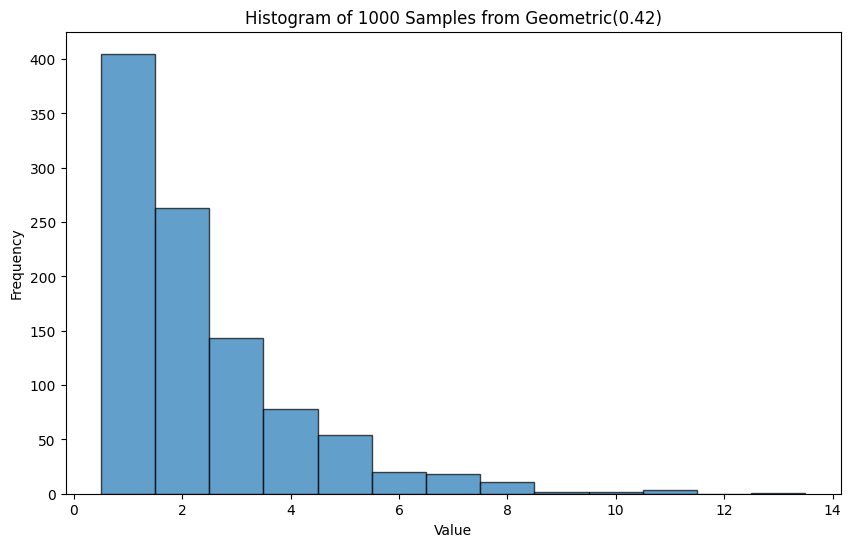

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def geometric_inversion_sampler(p, size=1):
    """
    Generate samples from Geometric(p) using the inverse CDF method.
    PMF: P(X=k) = p * (1-p)^(k-1), k=1,2,...
    """
    u = np.random.uniform(0, 1, size)
    log_term = np.log(1 - u + 1e-16) / np.log(1 - p)
    samples = np.floor(log_term).astype(int) + 1  # ensures support starts at 1
    return samples

#
p = 0.42
n_samples = 1000
samples = geometric_inversion_sampler(p, n_samples)

plt.figure(figsize=(10, 6))
plt.hist(samples, bins=np.arange(1, np.max(samples) + 2) - 0.5,
         edgecolor='black', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of 1000 Samples from Geometric(0.42)')
plt.show()



___
**(c)** The p.d.f. of the random variable $X$ is given by
	$$
	f(x) =
	\begin{cases}
		e^{x-2} & \text{for }0 \leq x \leq 2, \\
		e^{-x} & \text{for }x > 2, \\
		0 & \text{otherwise,}
	\end{cases}
	$$
	Describe and implement an inversion algorithm to generate samples of $X$. Generate 1,000 samples and plot a histogram. Compare the histogram and the p.d.f.


ANSWER:

# Inversion Method for Piecewise Exponential Distribution



$$
g(x) =
\begin{cases}
e^x, & 0 \leq x \leq 2, \\
e^{-x}, & x > 2, \\
0, & \text{otherwise}.
\end{cases}
$$

## 1. Normalization

Compute the normalizing constant:

$$
Z = \int_0^2 e^t dt + \int_2^\infty e^{-t} dt = (e^2 - 1) + e^{-2}
$$

Thus the proper pdf is:

$$
f(x) = \frac{g(x)}{Z} =
\begin{cases}
\frac{e^x}{Z}, & 0 \leq x \leq 2, \\
\frac{e^{-x}}{Z}, & x > 2, \\
0, & \text{otherwise}.
\end{cases}
$$

Numerically, $Z \approx 6.524391382167263$.

## 2. Cumulative Distribution Function (CDF)

- For $x < 0$: $F(x) = 0$
- For $0 \le x \le 2$:

$$
F(x) = \frac{1}{Z} \int_0^x e^t dt = \frac{e^x - 1}{Z}
$$

- For $x > 2$:

$$
F(x) = \frac{1}{Z} \left( (e^2 - 1) + \int_2^x e^{-t} dt \right) = \frac{e^2 - 1 + e^{-2} - e^{-x}}{Z}
$$

Check: $\lim_{x \to \infty} F(x) = \frac{e^2 - 1 + e^{-2}}{Z} = 1$

## 3. Inverse CDF (Quantile Function)

Let $U \sim \mathrm{Uniform}(0,1)$. Define the cutoff probability:

$$
p_0 = \Pr(0 \leq X \leq 2) = \frac{e^2 - 1}{Z}
$$

**Case 1:** If $0 \le U \le p_0$, then $U = \frac{e^{x} - 1}{Z}$ and solving for $x$ gives:

$$
X = F^{-1}(U) = \ln(1 + ZU), \quad (0 \leq X \leq 2)
$$

**Case 2:** If $p_0 < U \le 1$, then $U = \frac{e^2 - 1 + e^{-2} - e^{-x}}{Z}$ and solving gives:

$$
e^{-x} = e^2 - 1 + e^{-2} - ZU
$$

hence:

$$
X = F^{-1}(U) = -\ln(e^2 - 1 + e^{-2} - ZU), \quad (X > 2)
$$

## 4. Sampling Algorithm

1. Compute $Z = (e^2 - 1) + e^{-2}$ and $p_0 = (e^2 - 1)/Z$
2. Draw $U \sim \mathrm{Uniform}(0,1)$
3. If $U \le p_0$ set $X = \ln(1 + ZU)$
4. Otherwise set $X = -\ln(e^2 - 1 + e^{-2} - ZU)$
5. Repeat to obtain as many independent samples as needed



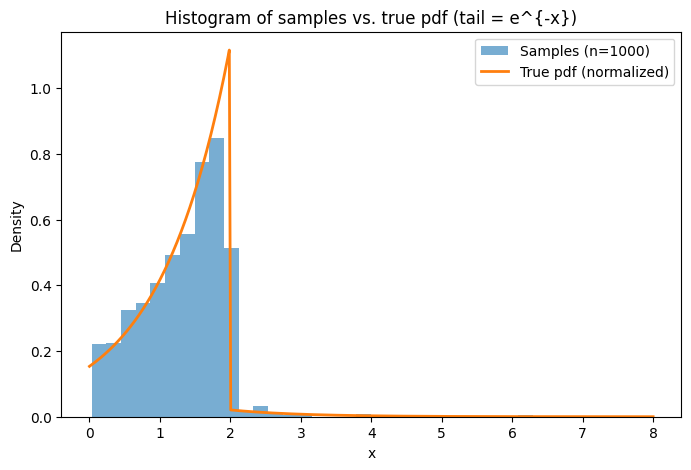

Normalization constant Z = 6.524391
P(0 <= X <= 2) = 0.979257
P(X > 2) = 0.020743


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Normalization and cutoff
e2 = np.exp(2.0)
Z = (e2 - 1.0) + np.exp(-2.0)
cutoff = (e2 - 1.0) / Z

def sample_X(n=1000):
    u = np.random.rand(n)
    X = np.zeros(n)
    mask1 = (u <= cutoff)
    X[mask1] = np.log(1 + Z * u[mask1])
    mask2 = ~mask1
    val = (e2 - 1.0) + np.exp(-2.0) - Z * u[mask2]
    X[mask2] = -np.log(val)
    return X

# Generate and plot
np.random.seed(42)
samples = sample_X(1000)

x = np.linspace(0, 8, 400)
pdf = np.where((0 <= x) & (x <= 2), np.exp(x)/Z, np.where(x > 2, np.exp(-x)/Z, 0))

plt.figure(figsize=(8,5))
plt.hist(samples, bins=30, density=True, alpha=0.6, label='Samples (n=1000)')
plt.plot(x, pdf, lw=2, label='True pdf (normalized)')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Histogram of samples vs. true pdf (tail = e^{-x})')
plt.legend()
plt.show()

print(f"Normalization constant Z = {Z:.6f}")
print(f"P(0 <= X <= 2) = {(e2 - 1.0)/Z:.6f}")
print(f"P(X > 2) = {np.exp(-2.0)/Z:.6f}")


<hr><hr>

## Question 3: Acceptance-Rejection (25 pts)

Let the random variable $X$ have density
$$f(x) = \begin{cases} (5 x^4 + 4x^3 + 3x^2+1)/4  & \text{ for } 0 \leq x \leq 1, \\
0 & \text{ otherwise. } \end{cases}$$

<hr>

**(a)** Give an acceptance-rejection algorithm to generate samples of
	$X$.

<hr>

### Ans.

### Target Density

The target density is:

$$
f(x) = \frac{5x^4 + 4x^3 + 3x^2 + 1}{4}, \quad 0 \leq x \leq 1
$$

and $f(x) = 0$ otherwise.

### Proposal Distribution

We choose the proposal distribution as $g(x) = 1$ for $0 \leq x \leq 1$ (Uniform[0,1]), which is easy to sample from.

### Bounding Constant

We need to find $c = \sup_{x \in [0,1]} \frac{f(x)}{g(x)} = \sup f(x)$ (since $g(x) = 1$).

Let $h(x) = 5x^4 + 4x^3 + 3x^2 + 1$, so $f(x) = h(x)/4$.

**Derivative analysis:**
$$
h'(x) = 20x^3 + 12x^2 + 6x = 2x(10x^2 + 6x + 3)
$$

The quadratic $10x^2 + 6x + 3$ has discriminant $36 - 120 = -84 < 0$, so it's always positive. Thus, $h'(x) \geq 0$ for $x \geq 0$, with equality only at $x = 0$. So $h(x)$ is strictly increasing on [0,1].

**Maximum value:**
$$
h(0) = 1, \quad h(1) = 5 + 4 + 3 + 1 = 13
$$
$$
\sup f(x) = \frac{13}{4}, \quad c = \frac{13}{4}
$$

### Algorithm Steps

1. Generate $Y \sim \text{Uniform}[0,1]$ (proposal sample)
2. Generate $U \sim \text{Uniform}[0,1]$ (independent)
3. Compute acceptance threshold:
   $$
   \frac{f(Y)}{c \cdot g(Y)} = \frac{f(Y)}{13/4} = \frac{4}{13} f(Y) = \frac{5Y^4 + 4Y^3 + 3Y^2 + 1}{13}
   $$
4. If $U \leq \frac{5Y^4 + 4Y^3 + 3Y^2 + 1}{13}$, accept $Y$ as a sample from $f(x)$
5. Otherwise, reject and repeat from step 1

### Efficiency

The expected acceptance probability is:
$$
\mathbb{P}(\text{accept}) = \frac{1}{c} = \frac{4}{13} \approx 0.3077
$$


In [ ]:
import numpy as np

def f(x):
    """Target density function."""
    return (5 * x**4 + 4 * x**3 + 3 * x**2 + 1) / 4

def generate_sample():
    """Generate a single sample from f(x) using acceptance-rejection."""
    c = 13 / 4  # Bounding constant
    while True:
        y = np.random.uniform(0, 1)  # Proposal from g(x) = Uniform[0,1]
        u = np.random.uniform(0, 1)  # Uniform for acceptance test
        if u <= f(y) / c:
            return y

# Example: Generate 1000 samples and print mean (should be close to E[X] under f)
samples = [generate_sample() for _ in range(1000)]
print("Mean of samples:", np.mean(samples))

Mean of samples: 0.7061255805802514


<hr>

**(b)** On average, how many samples from the uniform distribution over $[0, 1]$ would your acceptance-rejection algorithm need in order to generate one sample of $X$?

<hr>

### Ans.
## Part (b): Average Number of Uniform Samples Needed

In the acceptance-rejection algorithm:

- Each iteration uses **2 uniform samples**:
  - One for the proposal $Y \sim \text{Uniform}[0,1]$
  - One for the acceptance test $U \sim \text{Uniform}[0,1]$

The acceptance probability is:
$$
\mathbb{P}(\text{accept}) = \frac{1}{c} = \frac{1}{13/4} = \frac{4}{13}
$$

The number of iterations follows a geometric distribution with success probability $p = \frac{4}{13}$.

The expected number of iterations is:
$$
\mathbb{E}[\text{iterations}] = \frac{1}{p} = \frac{13}{4} = 3.25
$$

Therefore, the expected number of uniform samples needed is:
$$
\mathbb{E}[\text{uniform samples}] = 2 \times \mathbb{E}[\text{iterations}] = 2 \times \frac{13}{4} = \frac{26}{4} = 6.5
$$

**Answer:** On average, the algorithm needs **6.5 samples** from the uniform distribution over $[0,1]$ to generate one sample of $X$.

<hr>

**(c)** Use your algorithm in (a) to generate 2,500 samples of $X$. Note that this will require more than 2500 uniform random variables.

Plot a histogram of your sample   and compare it against the true pdf.

<hr>

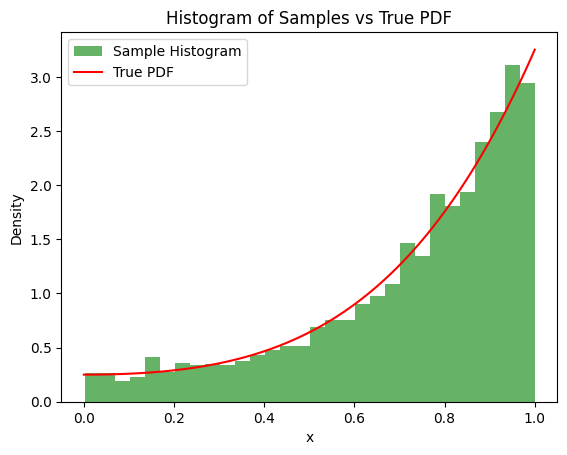

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    """Target density function."""
    return (5 * x**4 + 4 * x**3 + 3 * x**2 + 1) / 4

def generate_sample():
    """Generate a single sample from f(x) using acceptance-rejection."""
    c = 13 / 4  # Bounding constant
    while True:
        y = np.random.uniform(0, 1)  # Proposal from g(x) = Uniform[0,1]
        u = np.random.uniform(0, 1)  # Uniform for acceptance test
        if u <= f(y) / c:
            return y

# Generate 2500 samples
n_samples = 2500
samples = []
while len(samples) < n_samples:
    samples.append(generate_sample())

# Create x values for the true PDF
x = np.linspace(0, 1, 100)
pdf = f(x)

# Plot histogram of samples and true PDF
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g', label='Sample Histogram')
plt.plot(x, pdf, 'r-', label='True PDF')
plt.title('Histogram of Samples vs True PDF')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

<hr><hr>

## Question 4: Generalized Acceptance-Rejection (30 pts)

We want to generate a $\mathcal{N}(0,1)$ rv $X$, with pdf
$f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}} $,
using generalized acceptance-rejection.

<hr>

**(a)** First, suppose we choose the proposal distribution to be a \emph{Laplace} (i.e., two-sided Exponential) distribution, which has pdf $g(x) = e^{-|x|}/2$. Describe (and implement) an inversion algorithm to get samples from this distribution.

<hr>

### Description of the Inversion Algorithm

The Laplace distribution with pdf $g(x) = \frac{1}{2} e^{-|x|}$ (also known as the double exponential distribution with location 0 and scale 1) has the cumulative distribution function (CDF):

- For $x < 0$: $F(x) = \frac{1}{2} e^{x}$
- For $x \geq 0$: $F(x) = 1 - \frac{1}{2} e^{-x}$

To generate samples using the inversion method, draw a uniform random variable $U \sim \mathcal{U}(0,1)$ and compute the inverse CDF $X = F^{-1}(U)$. The inverse is derived as follows:

- If $U \leq 0.5$, solve $\frac{1}{2} e^{x} = U$ for $x < 0$:  
  $e^{x} = 2U$  
  $x = \ln(2U)$  
  (This yields $x < 0$ since $2U \leq 1$, so $\ln(2U) \leq 0$.)

- If $U > 0.5$, solve $1 - \frac{1}{2} e^{-x} = U$ for $x \geq 0$:  
  $\frac{1}{2} e^{-x} = 1 - U$  
  $e^{-x} = 2(1 - U)$  
  $-x = \ln(2(1 - U))$  
  $x = -\ln(2(1 - U))$  
  (This yields $x > 0$ since $2(1 - U) < 1$, so $\ln(2(1 - U)) < 0$, and negating makes it positive.)



In [ ]:
import numpy as np

def generate_laplace_samples(n):
    """
    Generate n samples from the Laplace distribution with pdf g(x) = (1/2) exp(-|x|)
    using the inversion method.

    Parameters:
    n (int): Number of samples to generate.

    Returns:
    np.ndarray: Array of n Laplace-distributed samples.
    """
    u = np.random.uniform(0, 1, n)  # Generate n uniform samples
    samples = np.zeros(n)

    # For u <= 0.5: x = log(2u)
    mask_low = u <= 0.5
    samples[mask_low] = np.log(2 * u[mask_low])

    # For u > 0.5: x = -log(2(1-u))
    mask_high = u > 0.5
    samples[mask_high] = -np.log(2 * (1 - u[mask_high]))

    return samples

# Example usage: Generate 5 samples
print(generate_laplace_samples(5))

[ 0.06479     0.50214185 -0.38563523 -2.04208074  0.01094297]


<hr>

**(b)** Determine the smallest $k$ such that $kg(x)\geq f(x)\,\forall\,x\in\mathbb{R}$. Using this, propose (and implement) an acceptance-rejection algorithm for sampling $X\sim\mathcal{N}(0,1)$, and compute the expected number of samples needed for generating each sample.

<hr>

### Ans.
## Part (b): Finding the Optimal $k$ and Acceptance-Rejection Algorithm

We have:
- Target: $f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}}$ (standard normal PDF)
- Proposal: $g(x) = \frac{e^{-|x|}}{2}$ (Laplace PDF)

We need the smallest $k$ such that $k \cdot g(x) \geq f(x)$ for all $x \in \mathbb{R}$.

### Step 1: Find the Maximum Ratio $f(x)/g(x)$

$$
\frac{f(x)}{g(x)} = \frac{\frac{e^{-x^2/2}}{\sqrt{2\pi}}}{\frac{e^{-|x|}}{2}} = \frac{2}{\sqrt{2\pi}} \cdot e^{-x^2/2 + |x|}
$$

Let $h(x) = \frac{f(x)}{g(x)} = \frac{2}{\sqrt{2\pi}} e^{-x^2/2 + |x|}$

We need to maximize $h(x)$. Since it's symmetric, consider $x \geq 0$:

For $x \geq 0$: $h(x) = \frac{2}{\sqrt{2\pi}} e^{-x^2/2 + x}$

Maximize $\phi(x) = -x^2/2 + x$:

$$
\phi'(x) = -x + 1 = 0 \Rightarrow x = 1
$$

$$
\phi''(x) = -1 < 0 \Rightarrow \text{maximum at } x = 1
$$

At $x = 1$:

$$
\phi(1) = -1/2 + 1 = 1/2
$$

$$
h(1) = \frac{2}{\sqrt{2\pi}} e^{1/2} = \frac{2e^{1/2}}{\sqrt{2\pi}}
$$

By symmetry, same maximum at $x = -1$.

### Step 2: Determine the Smallest $k$

$$
k = \max_{x \in \mathbb{R}} \frac{f(x)}{g(x)} = \frac{2e^{1/2}}{\sqrt{2\pi}} = \sqrt{\frac{2e}{\pi}}
$$

Numerically:

$$
k \approx \sqrt{\frac{2 \times 2.71828}{3.14159}} \approx \sqrt{1.73072} \approx 1.31549
$$

### Step 3: Acceptance-Rejection Algorithm

1. Generate $Y \sim \text{Laplace}(0,1)$ using inversion method from part (a)
2. Generate $U \sim \text{Uniform}(0,1)$
3. Accept $Y$ if $U \leq \frac{f(Y)}{k \cdot g(Y)}$
4. Else, reject and repeat

The acceptance probability is $\frac{1}{k} \approx \frac{1}{1.31549} \approx 0.760$

### Step 4: Expected Number of Samples

Each iteration uses:
- 1 Laplace sample (which requires 1 uniform)
- 1 uniform for acceptance test
- Total: 2 uniform samples per iteration

Expected iterations = $k \approx 1.31549$

Expected uniforms per normal sample = $2k \approx 2.63098$

**Final Answer:**

$$
\boxed{k = \sqrt{\frac{2e}{\pi}} \approx 1.3155}
$$

Expected number of uniform samples per normal sample: $2k \approx 2.6310$

In [ ]:
import numpy as np

def generate_laplace_samples(n):
    """
    Generate n samples from the Laplace distribution with pdf g(x) = (1/2) exp(-|x|)
    using the inversion method.

    Parameters:
    n (int): Number of samples to generate.

    Returns:
    np.ndarray: Array of n Laplace-distributed samples.
    """
    u = np.random.uniform(0, 1, n)
    samples = np.zeros(n)
    mask_low = u <= 0.5
    samples[mask_low] = np.log(2 * u[mask_low])
    mask_high = u > 0.5
    samples[mask_high] = -np.log(2 * (1 - u[mask_high]))
    return samples

def normal_pdf(x):
    """PDF of N(0,1)."""
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

def laplace_pdf(x):
    """PDF of Laplace (scale=1)."""
    return np.exp(-np.abs(x)) / 2

def generate_normal_samples_ar(n):
    """
    Generate n samples from N(0,1) using acceptance-rejection with Laplace proposal.

    Parameters:
    n (int): Number of samples to generate.

    Returns:
    np.ndarray: Array of n N(0,1)-distributed samples.
    """
    k = np.sqrt(2 * np.e / np.pi)  # Optimal k = sqrt(2e/pi) ≈ 1.3155

    accepted = []
    total_proposals = 0  # Track number of Laplace proposals

    while len(accepted) < n:
        # Generate batch of proposals (adjust batch_size for efficiency)
        batch_size = max(1, n - len(accepted))
        y = generate_laplace_samples(batch_size)
        u = np.random.uniform(0, 1, batch_size)
        total_proposals += batch_size

        # Acceptance criterion: U <= f(Y)/(k g(Y))
        ratio = normal_pdf(y) / (k * laplace_pdf(y))
        accept_mask = u <= ratio
        accepted.extend(y[accept_mask])

    # Trim to exactly n samples
    samples = np.array(accepted[:n])

    # Print expected number of proposals (theoretical and empirical)
    print(f"Theoretical expected number of proposals per sample: {k:.4f}")
    print(f"Empirical average number of proposals per sample: {total_proposals / n:.4f}")

    return samples

# Example usage: Generate 1000 samples
np.random.seed(42)  # For reproducibility
samples = generate_normal_samples_ar(1000)

# Optional: Verify mean and variance
print(f"Empirical mean: {np.mean(samples):.4f} (expected ≈ 0)")
print(f"Empirical variance: {np.var(samples):.4f} (expected ≈ 1)")


Theoretical expected number of proposals per sample: 1.3155
Empirical average number of proposals per sample: 1.3300
Empirical mean: -0.0070 (expected ≈ 0)
Empirical variance: 1.0701 (expected ≈ 1)


<hr>

**(c)** Generate $1000$ samples from your method in part (b), and plot the histogram of the samples. Also report the average and 95\% CI for the number of $U[0,1]$ samples needed to generate the $1000$ samples.

<hr>

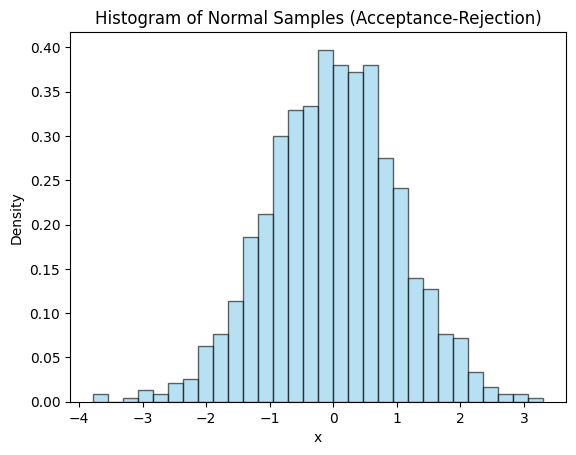

Average uniforms per sample: 2.666
95% CI: (2.586, 2.746)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Helper functions ---
def generate_laplace_samples(n):
    """Generate n samples from Laplace(0,1) with pdf (1/2) exp(-|x|)."""
    u = np.random.uniform(0, 1, n)
    samples = np.zeros(n)
    mask_low = u <= 0.5
    samples[mask_low] = np.log(2 * u[mask_low])
    mask_high = u > 0.5
    samples[mask_high] = -np.log(2 * (1 - u[mask_high]))
    return samples

def normal_pdf(x):
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

def laplace_pdf(x):
    return np.exp(-np.abs(x)) / 2

# --- Part (c): Generate 1000 samples ---
def generate_normal_samples_ar(n):
    k = np.sqrt(2 * np.e / np.pi)  # optimal constant
    samples = []
    total_uniforms = 0

    while len(samples) < n:
        # proposal (needs 1 uniform)
        y = generate_laplace_samples(1)[0]
        total_uniforms += 1

        # acceptance test (needs 1 uniform)
        u = np.random.uniform(0, 1)
        total_uniforms += 1

        if u <= normal_pdf(y) / (k * laplace_pdf(y)):
            samples.append(y)

    return np.array(samples), total_uniforms

# Run for 1000 samples
np.random.seed(123)
n_samples = 1000
samples, total_uniforms = generate_normal_samples_ar(n_samples)

# --- Plot histogram ---
plt.hist(samples, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='k')
plt.title("Histogram of Normal Samples (Acceptance-Rejection)")
plt.xlabel("x")
plt.ylabel("Density")
plt.show()

# --- Report average and 95% CI for uniforms per sample ---
uniforms_per_sample = total_uniforms / n_samples
# By CLT, approx normal: mean ± 1.96 * std_err
# Each accepted sample uses a random number of uniforms, but we approximate variance using geometric distribution with mean = k
k = np.sqrt(2 * np.e / np.pi)
p = 1 / k   # acceptance probability
# geometric distribution (#trials to success) has mean=1/p, var=(1-p)/p^2
var_trials = (1 - p) / (p**2)
# each trial uses 2 uniforms -> uniforms per sample variance
var_uniforms = (2**2) * var_trials
std_err = np.sqrt(var_uniforms / n_samples)

ci_lower = uniforms_per_sample - 1.96 * std_err
ci_upper = uniforms_per_sample + 1.96 * std_err

print(f"Average uniforms per sample: {uniforms_per_sample:.3f}")
print(f"95% CI: ({ci_lower:.3f}, {ci_upper:.3f})")


<hr>

**(d)** Now, suppose instead we choose the proposal distribution to be a Cauchy  distribution with pdf $g(x) = \frac{1}{\pi(1+x^2)}$. Describe and implement an inversion algorithm to get samples from this distribution, and plot the histogram of 1000 samples from this distribution.

<hr>



We have probability density function:

$$
g(x) = \frac{1}{\pi(1+x^2)}, \quad x \in \mathbb{R}.
$$

---

### Step 1. CDF of the Cauchy Distribution

The cumulative distribution function (CDF) of the standard Cauchy distribution is

$$
G(x) = \frac{1}{\pi} \arctan(x) + \frac{1}{2}.
$$

---

### Step 2. Inverse CDF

To use the inversion method, let \$U \sim \text{Uniform}(0,1)\$ and solve for \$x\$ in

$$
U = G(x) = \frac{1}{\pi} \arctan(x) + \frac{1}{2}.
$$

Rearranging:

$$
\pi \left(U - \tfrac{1}{2}\right) = \arctan(x).
$$

Taking tangent on both sides:

$$
x = \tan\!\Big(\pi (U - \tfrac{1}{2})\Big).
$$

Thus, the inverse-CDF is

$$
G^{-1}(U) = \tan\!\Big(\pi (U - 0.5)\Big).
$$

---

### Step 3. Sampling Algorithm

To generate samples from the Cauchy distribution:

1. Generate \$U \sim \text{Uniform}(0,1)\$.
2. Set

   $$
   X = \tan\!\Big(\pi (U - 0.5)\Big).
   $$
3. Then \$X \sim \text{Cauchy}(0,1)\$.




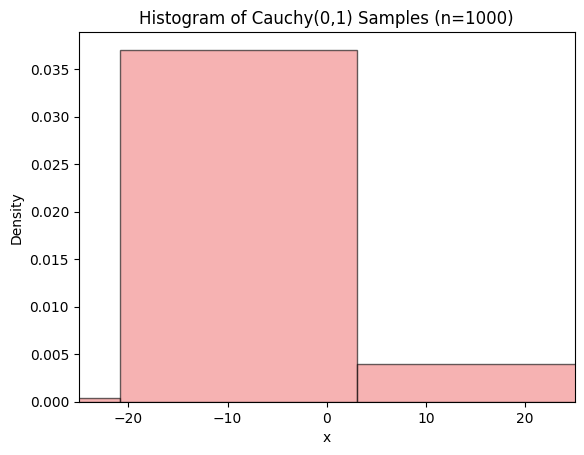

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sample_cauchy(n):
    """
    Generate n samples from Cauchy(0,1) using inversion method.
    CDF inverse: x = tan(pi * (u - 0.5))
    """
    u = np.random.uniform(0, 1, n)
    return np.tan(np.pi * (u - 0.5))

# Generate 1000 samples
np.random.seed(42)
samples_cauchy = sample_cauchy(1000)

# Plot histogram
plt.hist(samples_cauchy, bins=50, density=True, alpha=0.6, color='lightcoral', edgecolor='k')
plt.title("Histogram of Cauchy(0,1) Samples (n=1000)")
plt.xlabel("x")
plt.ylabel("Density")
plt.xlim(-25, 25)  # limit x-axis to cut off extreme tails
plt.show()


<hr>

**(e)** Repeat parts $(b)$ and $(c)$ for this proposal distribution.

<hr>

### Optimal $k$ for Cauchy proposal

Target (standard normal) pdf:

$$
f(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2/2}.
$$

Proposal (standard Cauchy) pdf:

$$
g(x) = \frac{1}{\pi(1+x^2)}.
$$

Consider the ratio:

$$
\frac{f(x)}{g(x)}
= \frac{\tfrac{1}{\sqrt{2\pi}} e^{-x^2/2}}{\tfrac{1}{\pi(1+x^2)}}
= \frac{\pi}{\sqrt{2\pi}} (1+x^2) e^{-x^2/2}.
$$

Simplify the constant:

$$
\frac{\pi}{\sqrt{2\pi}} = \sqrt{\frac{\pi}{2}}.
$$

Thus

$$
R(x) \equiv \frac{f(x)}{g(x)} = \sqrt{\frac{\pi}{2}}(1+x^2) e^{-x^2/2}.
$$

We need the smallest $k$ with $k g(x)\ge f(x)$ for all $x$, i.e.

$$
k = \max_{x\in\mathbb{R}} R(x).
$$

Because $R(x)$ is even, consider $x\ge 0$. Define

$$
\phi(x) = \ln R(x) = \tfrac{1}{2}\ln\!\left(\tfrac{\pi}{2}\right) + \ln(1+x^2) - \tfrac{x^2}{2}.
$$

Differentiate:

$$
\phi'(x) = \frac{2x}{1+x^2} - x.
$$

Setting $\phi'(x)=0$:

- One solution is $x=0$.
- For $x \neq 0$, dividing through by $x$ gives

$$
\frac{2}{1+x^2} = 1 \;\;\Longrightarrow\;\; 2 = 1 + x^2 \;\;\Longrightarrow\;\; x^2=1.
$$

So critical points are $x=0, \pm 1$.

Evaluate $R(x)$:

- At $x=0$:

$$
R(0) = \sqrt{\frac{\pi}{2}} \approx 1.2533.
$$

- At $x=1$:

$$
R(1) = \sqrt{\frac{\pi}{2}}\,(1+1)\,e^{-1/2}
= 2 e^{-1/2} \sqrt{\frac{\pi}{2}}
= \sqrt{2\pi}\, e^{-1/2}.
$$

Numerically,

$$
R(1) \approx 1.5203 > R(0).
$$

Thus the maximum occurs at $|x|=1$, giving

$$
k = \sqrt{2\pi}\, e^{-1/2} \;\approx\; 1.5203.
$$

---

**Acceptance probability:**

$$
\Pr(\text{accept}) = \frac{1}{k} \approx 0.6576.
$$

**Expected number of proposals** (Cauchy draws) per accepted normal sample:

$$
\mathbb{E}[\text{proposals per success}] = k \approx 1.5203.
$$

Since each proposal uses two uniforms (one for the Cauchy draw, one for the acceptance test), the expected number of uniforms per normal sample is

$$
\mathbb{E}[\text{uniforms per normal}] = 2k \approx 3.0407.
$$

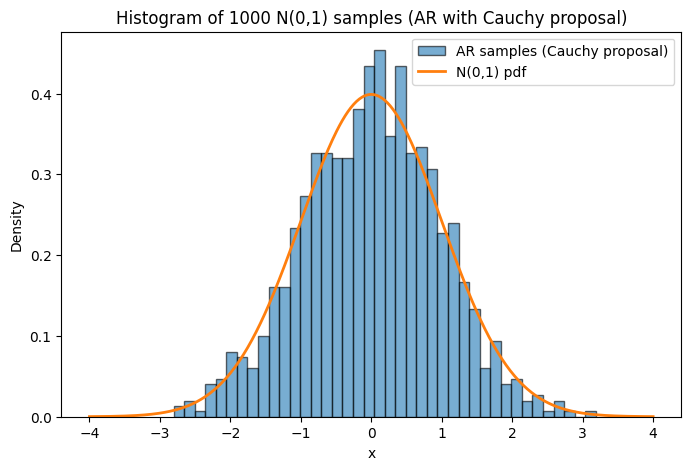

=== Results (Cauchy proposal) ===
Optimal k (theoretical) = 1.5203469011
Theoretical acceptance probability = 1/k = 0.657745
Total uniforms used = 3128
Empirical uniforms per sample (avg) = 3.128000
Theoretical expected uniforms per sample = 3.040694
95% CI for uniforms per sample (CLT approx): (3.017744, 3.238256)
Total proposals drawn = 1564, empirical proposals per sample = 1.564000


In [ ]:
#Part B and C for New Distribution:
import numpy as np
import matplotlib.pyplot as plt
import math

# ---------- densities ----------
def normal_pdf(x):
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

def cauchy_pdf(x):
    return 1.0 / (math.pi * (1 + x**2))

# ---------- Cauchy sampling by inversion ----------
def sample_cauchy(n):
    """
    Generate n Cauchy(0,1) samples via inverse CDF:
      X = tan(pi*(U - 0.5)), U ~ Uniform(0,1)
    """
    u = np.random.uniform(0, 1, n)
    return np.tan(np.pi * (u - 0.5))

# ---------- Acceptance-Rejection using Cauchy proposal ----------
def generate_normal_via_cauchy_ar(n):
    """
    Generate n samples from N(0,1) using AR with Cauchy(0,1) proposal.
    Returns:
      samples: np.array length n
      total_uniforms: total number of U(0,1) draws used
      total_proposals: total number of Cauchy proposals drawn
      accepted_count: should equal n
    """
    k = math.sqrt(2 * math.pi) * math.exp(-0.5)  # optimal k
    samples = []
    total_uniforms = 0
    total_proposals = 0

    while len(samples) < n:
        # 1 uniform to draw Cauchy
        u1 = np.random.uniform()
        total_uniforms += 1
        y = math.tan(math.pi * (u1 - 0.5))  # Cauchy draw
        total_proposals += 1

        # 1 uniform for acceptance test
        u2 = np.random.uniform()
        total_uniforms += 1

        ratio = normal_pdf(y) / (k * cauchy_pdf(y))
        if u2 <= ratio:
            samples.append(y)

    return np.array(samples), total_uniforms, total_proposals, k

# ---------- Run experiment ----------
np.random.seed(2025)  # for reproducibility
n_samples = 1000
samples, total_uniforms, total_proposals, k = generate_normal_via_cauchy_ar(n_samples)

# ---------- Plot histogram with true normal density overlaid ----------
plt.figure(figsize=(8,5))
count, bins, _ = plt.hist(samples, bins=40, density=True, alpha=0.6, edgecolor='k', label='AR samples (Cauchy proposal)')
# overlay true normal pdf
x = np.linspace(-4, 4, 400)
plt.plot(x, normal_pdf(x), linewidth=2, label='N(0,1) pdf')
plt.title("Histogram of 1000 N(0,1) samples (AR with Cauchy proposal)")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()

# ---------- Compute averages and 95% CI for uniforms-per-sample ----------
uniforms_per_sample_empirical = total_uniforms / n_samples

# Theoretical acceptance prob and variance (geometric number of proposals to success)
p = 1.0 / k             # acceptance probability
mean_trials = 1.0 / p   # mean # proposals (geometric)
var_trials = (1 - p) / (p**2)   # variance of geometric (#trials)
# each proposal uses 2 uniforms -> uniforms_per_success has variance 4 * var_trials
var_uniforms_per_success = 4.0 * var_trials
std_err = math.sqrt(var_uniforms_per_success / n_samples)

ci_lower = uniforms_per_sample_empirical - 1.96 * std_err
ci_upper = uniforms_per_sample_empirical + 1.96 * std_err

# Print results
print("=== Results (Cauchy proposal) ===")
print(f"Optimal k (theoretical) = {k:.10f}")
print(f"Theoretical acceptance probability = 1/k = {1.0/k:.6f}")
print(f"Total uniforms used = {total_uniforms}")
print(f"Empirical uniforms per sample (avg) = {uniforms_per_sample_empirical:.6f}")
print(f"Theoretical expected uniforms per sample = {2*k:.6f}")
print(f"95% CI for uniforms per sample (CLT approx): ({ci_lower:.6f}, {ci_upper:.6f})")
print(f"Total proposals drawn = {total_proposals}, empirical proposals per sample = {total_proposals / n_samples:.6f}")
